In [47]:
import requests
import pandas as pd
import io
from matplotlib import pyplot as plt

In [2]:
web_pull_csv = requests.get('https://data.nola.gov/resource/bevf-jgit.csv')

In [6]:
web_pull_cotnent = web_pull_csv.content
service_call_data_2017 = pd.read_csv(io.StringIO(web_pull_cotnent.decode('utf-8')))

In [20]:
service_call_data_2017.counts()


AttributeError: 'DataFrame' object has no attribute 'counts'

In [22]:
typetext = service_call_data_2017['type_']
xy = typetext.value_counts()

In [23]:
type(xy)

pandas.core.series.Series

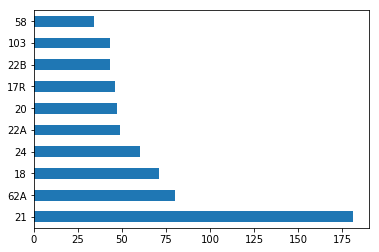

In [80]:

xy[:10].plot(kind='barh',rot=0)
plt.show()

In [54]:
k = xy.keys()
y = list(xy)

In [71]:
k = list(xy.keys())
y = list(xy.values)
y[8]

43

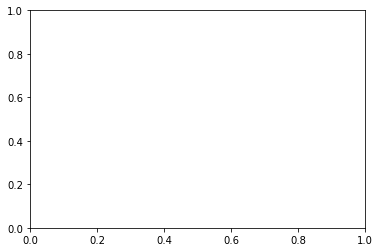

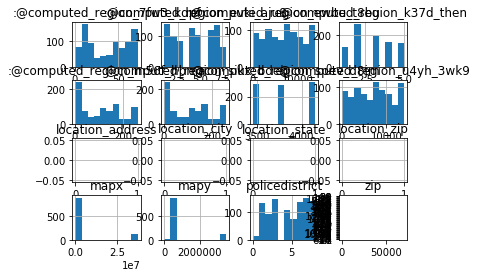

In [77]:
plt.bar(range(len(y)),y)
plt.show()